In [1]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.automl import H2OAutoML
from time import process_time

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,6 mins 20 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_1o1irg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,223.7 Mb
H2O_cluster_total_cores:,1
H2O_cluster_allowed_cores:,1
H2O_cluster_status:,"locked, healthy"


In [3]:
df = h2o.upload_file('../../Data/Titanic/processed/train.csv')
df["Survived"] = df["Survived"].asfactor()
response = "Survived"
predictors=[]
for col in df.columns:
    if col != 'Survived':
        predictors.append(col)

train = h2o.upload_file('../../Data/Titanic/processed/train.csv')
valid = h2o.upload_file('../../Data/Titanic/processed/test.csv')

titanic_gbm = H2OGradientBoostingEstimator()

t1_start = process_time()
titanic_gbm.train(x = predictors,
               y = response,
               training_frame = train,
               validation_frame = valid)
t1_stop = process_time()


print("Elapsed time in seconds : ",t1_stop-t1_start)  

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
Elapsed time in seconds :  0.12263084599999985


In [4]:
print( titanic_gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1593679573774_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,13331.0,5.0,5.0,5.0,6.0,25.0,16.58




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.07245408618047408
RMSE: 0.2691729670313757
MAE: 0.18735178712178835
RMSLE: 0.18900132289100083
Mean Residual Deviance: 0.07245408618047408

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.14013480053604377
RMSE: 0.37434583013043404
MAE: 0.26225185357679565
RMSLE: 0.26655285906820214
Mean Residual Deviance: 0.14013480053604377

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-07-02 08:52:52,0.001 sec,0.0,0.490768,0.481707,0.240853,0.478536,0.469850,0.228996
1,,2020-07-02 08:52:52,0.180 sec,1.0,0.464765,0.455553,0.216007,0.457877,0.448502,0.209651
2,,2020-07-02 08:52:52,0.257 sec,2.0,0.442511,0.432029,0.195816,0.441346,0.430136,0.194786
3,,2020-07-02 08:52:52,0.306 sec,3.0,0.423495,0.410962,0.179348,0.428013,0.414151,0.183195
4,,2020-07-02 08:52:52,0.352 sec,4.0,0.407270,0.391868,0.165869,0.415363,0.397937,0.172526
5,,2020-07-02 08:52:53,0.397 sec,5.0,0.393587,0.374955,0.154911,0.406667,0.384531,0.165378
6,,2020-07-02 08:52:53,0.428 sec,6.0,0.381897,0.359658,0.145845,0.399268,0.372532,0.159415
7,,2020-07-02 08:52:53,0.457 sec,7.0,0.370665,0.344687,0.137393,0.392310,0.360835,0.153907
8,,2020-07-02 08:52:53,0.499 sec,8.0,0.361926,0.332047,0.130990,0.386741,0.350596,0.149569
9,,2020-07-02 08:52:53,0.516 sec,9.0,0.353512,0.319611,0.124971,0.383007,0.341341,0.146694



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Title_Mr,239.626770,1.000000,0.453630
1,Age,78.370544,0.327053,0.148361
2,PassengerId,59.534122,0.248445,0.112702
3,SibSp,53.454494,0.223074,0.101193
4,Pclass,46.978302,0.196048,0.088933
5,Fare,30.483267,0.127211,0.057707
6,Title_Miss,5.196883,0.021687,0.009838
7,Sex_female,3.780342,0.015776,0.007156
8,Parch,3.443060,0.014368,0.006518
9,Embarked_S,2.608781,0.010887,0.004939


In [5]:
X_test = h2o.upload_file('../../Data/Titanic/processed/X_test.csv')
predictions = titanic_gbm.predict(X_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [6]:
import pandas as pd
y_test = pd.read_csv("../../Data/Titanic/processed/y_test.csv")
y_test = y_test.Survived
predictions = predictions.as_data_frame()

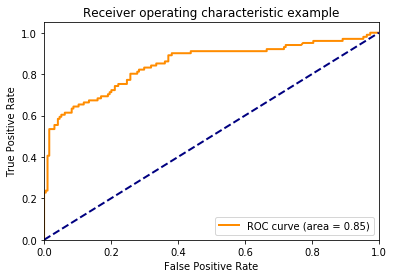

<Figure size 432x288 with 0 Axes>

In [7]:
from sklearn.metrics import roc_curve,auc

import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
plt.savefig("H2O_Titanic_ROC.pdf")